In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
df=pd.read_csv('web_scrapping.csv')
df

,Unnamed: 0,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
0,0,SAMSUNG,Galaxy,['Phantom Black'],"₹1,57,999",['12 GB RAM'],['512 GB'],['7.6'],['10MP'],['12'],['4400'],['1']
1,1,APPLE,iPhone,['Pacific Blue'],"₹1,55,900",NaN,['512 GB'],['6.7'],['12MP'],['12'],NaN,['1']
2,2,APPLE,iPhone,['Gold'],"₹1,55,900",NaN,['512 GB'],['6.7'],['12MP'],['12'],NaN,['1']
3,3,SAMSUNG,Galaxy,['Mystic Bronze'],"₹1,49,999",['12 GB RAM'],['256 GB'],['7.6'],NaN,['12'],['4500'],['1']
4,4,SAMSUNG,Galaxy,['Phantom Green'],"₹1,49,999",['12 GB RAM'],['256 GB'],['7.6'],['10MP'],['12'],['4400'],['1']
...,...,...,...,...,...,...,...,...,...,...,...,...
883,883,Redmi,Note,['Red'],"₹11,874",['4 GB RAM'],['64 GB'],['6.26'],NaN,['12'],['4000'],['1']
884,884,REDMI,9,['Matte Black'],"₹11,830",['4 GB RAM'],['64 GB'],['6.53'],['8MP'],['13'],['5020'],['1']
885,885,Tecno,Camon,['Midnight Black'],"₹11,800",['4 GB RAM'],['64 GB'],['6.2'],['16MP'],['13'],['3500'],NaN
886,886,OPPO,A31,['Mystery Black'],"₹11,769",['4 GB RAM'],['64 GB'],['6.5'],['8MP'],['12'],['4230'],['1']


In [3]:
# Dropping unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

### Data Cleaning

Removing unwanted symbols from our data.

In [4]:
df['Colour']=df['Colour'].str.strip('[]')
df['RAM']=df['RAM'].str.strip('[]')
df['ROM']=df['ROM'].str.strip('[]')
df['Display']=df['Display'].str.strip('[]')
df['Front Camera']=df['Front Camera'].str.strip('[]')
df['Rear Camera']=df['Rear Camera'].str.strip('[]')
df['Battery']=df['Battery'].str.strip('[]')
df['Warranty Period']=df['Warranty Period'].str.strip('[]')

In [5]:
df['Colour'].replace('\'','', regex=True, inplace=True)
df['RAM'].replace('\'','', regex=True, inplace=True)
df['ROM'].replace('\'','', regex=True, inplace=True)
df['Display'].replace('\'','', regex=True, inplace=True)
df['Front Camera'].replace('\'','', regex=True, inplace=True)
df['Rear Camera'].replace('\'','', regex=True, inplace=True)
df['Battery'].replace('\'','', regex=True, inplace=True)
df['Warranty Period'].replace('\'','', regex=True, inplace=True)

In [6]:
df

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
0,SAMSUNG,Galaxy,Phantom Black,"₹1,57,999",12 GB RAM,512 GB,7.6,10MP,12,4400,1
1,APPLE,iPhone,Pacific Blue,"₹1,55,900",NaN,512 GB,6.7,12MP,12,NaN,1
2,APPLE,iPhone,Gold,"₹1,55,900",NaN,512 GB,6.7,12MP,12,NaN,1
3,SAMSUNG,Galaxy,Mystic Bronze,"₹1,49,999",12 GB RAM,256 GB,7.6,NaN,12,4500,1
4,SAMSUNG,Galaxy,Phantom Green,"₹1,49,999",12 GB RAM,256 GB,7.6,10MP,12,4400,1
...,...,...,...,...,...,...,...,...,...,...,...
883,Redmi,Note,Red,"₹11,874",4 GB RAM,64 GB,6.26,NaN,12,4000,1
884,REDMI,9,Matte Black,"₹11,830",4 GB RAM,64 GB,6.53,8MP,13,5020,1
885,Tecno,Camon,Midnight Black,"₹11,800",4 GB RAM,64 GB,6.2,16MP,13,3500,NaN
886,OPPO,A31,Mystery Black,"₹11,769",4 GB RAM,64 GB,6.5,8MP,12,4230,1


In [7]:
#checking Shape of data
df.shape

(888, 11)

In [8]:
df.describe()

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
count,888,888,885,888,799,888,864,784,882,796,792
unique,30,155,319,314,7,8,52,17,14,62,1
top,SAMSUNG,Galaxy,Black,"₹14,999",4 GB RAM,128 GB,6.5,16MP,48,5000,1
freq,177,167,77,25,241,414,142,221,271,203,792


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            888 non-null    object
 1   Model Name       888 non-null    object
 2   Colour           885 non-null    object
 3   Price            888 non-null    object
 4   RAM              799 non-null    object
 5   ROM              888 non-null    object
 6   Display          864 non-null    object
 7   Front Camera     784 non-null    object
 8   Rear Camera      882 non-null    object
 9   Battery          796 non-null    object
 10  Warranty Period  792 non-null    object
dtypes: object(11)
memory usage: 76.4+ KB


### Checking for Null values in data.

In [10]:
df.isnull().sum()

Brand                0
Model Name           0
Colour               3
Price                0
RAM                 89
ROM                  0
Display             24
Front Camera       104
Rear Camera          6
Battery             92
Warranty Period     96
dtype: int64

In [11]:
df['Colour'].mode()[0],df['RAM'].mode()[0],df['Display'].mode()[0],df['Battery'].mode()[0],df['Warranty Period'].mode()[0],df['Front Camera'].mode()[0],df['Rear Camera'].mode()[0]

('Black', '4 GB RAM', '6.5', '5000', '1', '16MP', '48')

In [12]:
# Filling Null values with  mode.
df['Colour'].fillna(df['Colour'].mode()[0],axis=0,inplace=True)
df['RAM'].fillna(df['RAM'].mode()[0],axis=0,inplace=True)
df['Display'].fillna(df['Display'].mode()[0],axis=0,inplace=True)
df['Front Camera'].fillna(df['Front Camera'].mode()[0],axis=0,inplace=True)
df['Rear Camera'].fillna(df['Rear Camera'].mode()[0],axis=0,inplace=True)
df['Battery'].fillna(df['Battery'].mode()[0],axis=0,inplace=True)
df['Warranty Period'].fillna(df['Warranty Period'].mode()[0],axis=0,inplace=True)

In [13]:
df.isnull().sum() 

Brand              0
Model Name         0
Colour             0
Price              0
RAM                0
ROM                0
Display            0
Front Camera       0
Rear Camera        0
Battery            0
Warranty Period    0
dtype: int64

In [14]:
df

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
0,SAMSUNG,Galaxy,Phantom Black,"₹1,57,999",12 GB RAM,512 GB,7.6,10MP,12,4400,1
1,APPLE,iPhone,Pacific Blue,"₹1,55,900",4 GB RAM,512 GB,6.7,12MP,12,5000,1
2,APPLE,iPhone,Gold,"₹1,55,900",4 GB RAM,512 GB,6.7,12MP,12,5000,1
3,SAMSUNG,Galaxy,Mystic Bronze,"₹1,49,999",12 GB RAM,256 GB,7.6,16MP,12,4500,1
4,SAMSUNG,Galaxy,Phantom Green,"₹1,49,999",12 GB RAM,256 GB,7.6,10MP,12,4400,1
...,...,...,...,...,...,...,...,...,...,...,...
883,Redmi,Note,Red,"₹11,874",4 GB RAM,64 GB,6.26,16MP,12,4000,1
884,REDMI,9,Matte Black,"₹11,830",4 GB RAM,64 GB,6.53,8MP,13,5020,1
885,Tecno,Camon,Midnight Black,"₹11,800",4 GB RAM,64 GB,6.2,16MP,13,3500,1
886,OPPO,A31,Mystery Black,"₹11,769",4 GB RAM,64 GB,6.5,8MP,12,4230,1


## Exploratory  Data Analysis

### BRAND

In [15]:
df["Brand"].unique()

array(['SAMSUNG', 'APPLE', 'MOTOROLA', 'vivo', 'OPPO', 'Nokia', 'LG',
       'Mi', 'Apple', 'ASUS', 'realme', 'Google', 'Lenovo', 'Redmi',
       'POCO', 'Honor', 'MI', 'Moto', 'REDMI', 'GIONEE', 'Micromax',
       'Huawei', 'Motorola', 'Infinix', 'Panasonic', 'Tecno', 'YU',
       'Infocus', 'Itel', 'LYF'], dtype=object)

In total there are 30 different brands in our data.

<AxesSubplot:xlabel='Brand', ylabel='count'>

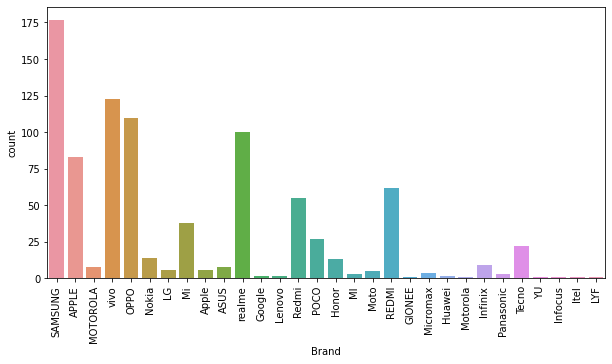

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='x',rotation=90)
sns.countplot(df['Brand'])

From the above graph, we can conclude that there are many SAMSUNG phones followed by VIVO then OPPO. 



LYF,Itel,YU has least number of phones from our collected data.

### RAM

In [17]:
df['RAM'].value_counts()

4 GB RAM     330
6 GB RAM     239
8 GB RAM     213
3 GB RAM      66
12 GB RAM     25
2 GB RAM      13
1 GB RAM       2
Name: RAM, dtype: int64

<AxesSubplot:xlabel='RAM', ylabel='count'>

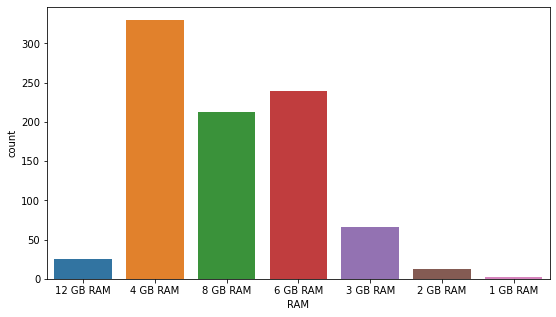

In [18]:
fig, ax = plt.subplots(figsize = (9,5))
ax.tick_params(axis='x')
sns.countplot(df['RAM'])

From the data we have collected, we can conclude that there are more phones with 4GB RAM followed by 6GB RAM. 

There are only few mobiles having 1GB,2GB,12GB RAM.

<AxesSubplot:xlabel='RAM', ylabel='count'>

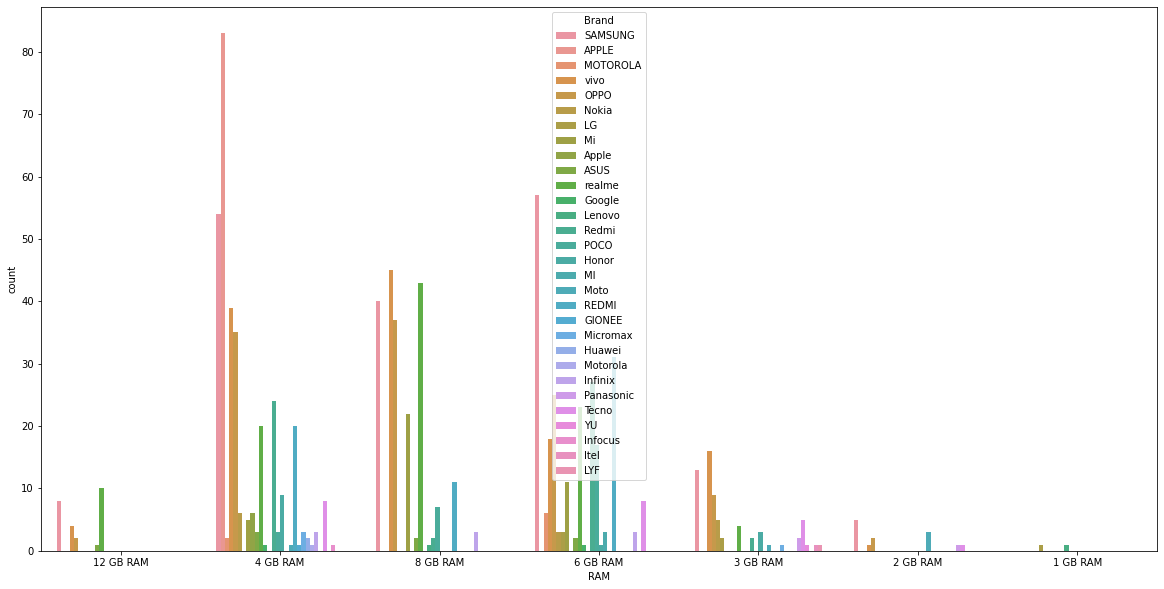

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
ax.tick_params(axis='x')
sns.countplot(df['RAM'],hue=df['Brand'])

 Graph shows the variations of RAM with respective of the the brands.

APPLE with 4GB RAM stays in first position with having maximun number of phones. and SAMSUNG with 6GB RAM follows it.

### ROM

In [20]:
df[df['ROM']=='']

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
18,SAMSUNG,Galaxy,Ceramic White,"₹1,17,990",12 GB RAM,,6.4,16MP,16,4100,1


As we can see that ROM for this particular data is empty so am trying to fill with mode. 

In [21]:
df['ROM'].mode()

0    128 GB
dtype: object

In [22]:
df['ROM'][18]='128 GB'

In [23]:
#Checking whether the value is filled or not
df[df['ROM']=='']

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period


In [24]:
df['ROM'].value_counts()

128 GB    415
64 GB     286
256 GB     86
32 GB      71
16 GB      16
512 GB     12
8 GB        2
Name: ROM, dtype: int64

<AxesSubplot:xlabel='ROM', ylabel='count'>

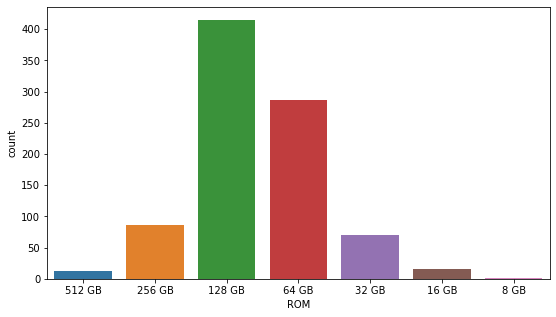

In [25]:
fig, ax = plt.subplots(figsize = (9,5))
ax.tick_params(axis='x')
sns.countplot(df['ROM'])

There are many phones with 128GB RAM and 64GB RAM .

Very few phones have 8GB and 16GB RAM.

<AxesSubplot:xlabel='ROM', ylabel='count'>

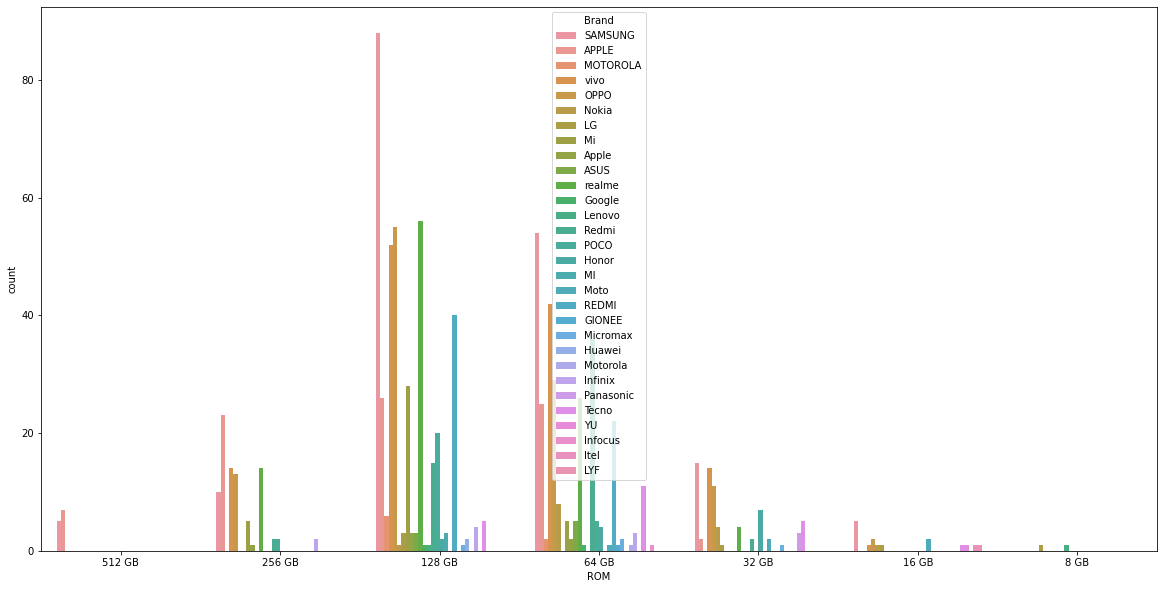

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
ax.tick_params(axis='x')
sns.countplot(df['ROM'],hue=df['Brand'])

Above graph represents variations in ROM for every BRAND.  

SAMSUNG has many phones with 128GB ROM and there are very few LYF phones with 64GB RAM.

### FRONT CAMERA

In [27]:
df['Front Camera'].value_counts()

16MP    325
8MP     154
32MP     97
20MP     78
12MP     61
13MP     56
5MP      32
7MP      29
24MP     15
25MP     12
10MP     12
44MP     10
2MP       2
40MP      2
6MP       1
3MP       1
1MP       1
Name: Front Camera, dtype: int64

The Values represents the number of phones with  front camera having different Mega Pixels.

<AxesSubplot:xlabel='Front Camera', ylabel='count'>

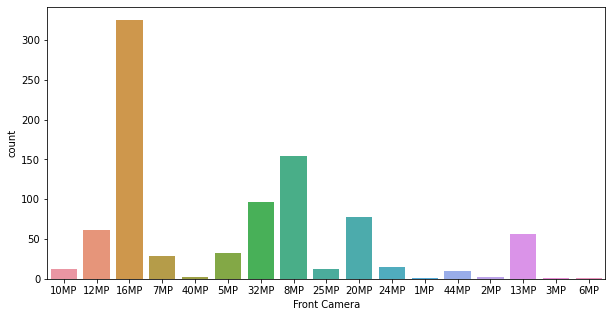

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='x')
sns.countplot(df['Front Camera'])

Here we can analyse that there are more than 300 mobiles with front Camera having 16MP.

There are very few mobiles with  front camera having 1MP,2MP,3MP,6MP.

### REAR CAMERA

In [29]:
df['Rear Camera'].value_counts()

48        277
64        182
13        174
12        119
16         67
108        25
12, 12     21
20          5
8           4
50          4
25          4
32          3
24          2
21          1
Name: Rear Camera, dtype: int64

The Values represents the number of phones with  rear camera having different Mega Pixels.

<AxesSubplot:xlabel='Rear Camera', ylabel='count'>

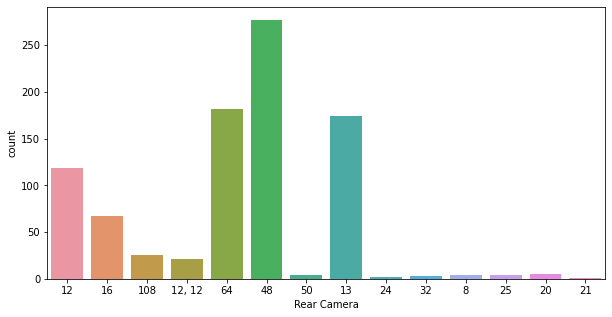

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='x')
sns.countplot(df['Rear Camera'])

Many mobiles have 48MP Rear camera and very few phoes have 24MP,32MP,8MP,25MP,20MP rear camera.

### COLOUR

In [31]:
df['Colour'].nunique()

319

There are 319 different colours in total.

In [32]:
df['Colour'].value_counts()

Black                    80
Gold                     44
Blue                     33
White                    23
Red                      19
                         ..
2nd Generation, Black     1
Ceramic White             1
Out of                    1
Midday Dream              1
Coral Blue                1
Name: Colour, Length: 319, dtype: int64

Here we can see the number of mobiles having different colours.

There are 80 Black coloured mobiles and 44 Gold coloured mobiles.

There are few unique colours as well.

### BATTERY

In [33]:
df['Battery'].unique()

array(['4400', '5000', '4500', '4100', '3400', '3300', '4300', '2510',
       '4200', '3000', '3730', '4000', '3320', '4780', '6000', '4315',
       '3700', '2600', '3200', '4520', '4350', '3140', '5065', '3800',
       '3765', '3500', '7000', '2850', '4820', '4025', '3600', '4310',
       '2300', '4250', '3315', '5020', '3260', '3225', '4015', '4010',
       '5160', '3010', '3750', '2730', '4030', '2900', '3630', '4035',
       '4900', '2970', '4998', '4230', '2540', '3340', '3180', '3080',
       '2910', '2400', '4020', '2800', '3360', '3410'], dtype=object)

The above are the different StorageQuantities of different mobilles that we have collected.

In [34]:
df['Battery'].value_counts()

5000    295
4000    124
4500     60
6000     59
5020     36
       ... 
3225      1
2300      1
3140      1
3320      1
2540      1
Name: Battery, Length: 62, dtype: int64

There are 295 mobiles with 5000MAH battery and 124 mobiles with 4000MAH battery

Few mobiles have  battry capacities like 3630MAH,2800MAH,3800MAH etc.

###  DISPLAY

In [35]:
df['Display'].unique()

array(['7.6', '6.7', '6.1', '5.8', '6.4', '6.5', '6.8', '6.9', '5.5',
       '5.4', '4.7', '6.2', '6.56', '5.99', '6.67', '6.78', '6.59',
       '6.44', '5.1', '5.9', '6.43', '5.6', '6.39', '6.81', '6.55',
       '5.488', '6.28', '6.57', '5.81', '6.3', '5.2', '6.41', '6.6',
       '5.7', '6.18', '6.53', '6.58', '5.84', '6.22', '6.38', '6.49',
       '6.52', '6.51', '6.95', '6.85', '6.35', '5.93', '6.26', '6.088',
       '6.47', '5.65', '6.515'], dtype=object)

Diferent types of display options available for us are shown above.

In [36]:
df['Display'].value_counts()

6.5      166
6.4       71
6.67      69
6.1       55
6.43      41
6.3       40
6.53      38
6.44      36
5.5       34
6.7       32
6.51      32
6.2       25
5.99      22
6.39      22
6.58      13
6.52      12
6.55      12
5.2       11
6.22      11
6.56      11
5.4        9
6.6        9
6.35       9
6.8        8
5.6        8
4.7        8
6.26       8
6.78       7
5.84       7
6.57       7
5.7        7
6.95       5
5.8        5
6.38       4
6.59       4
5.93       4
6.41       3
6.9        3
7.6        3
6.18       2
6.28       2
5.65       2
5.1        2
5.81       1
6.81       1
6.088      1
6.49       1
6.47       1
5.9        1
6.85       1
6.515      1
5.488      1
Name: Display, dtype: int64

There are 166 mobiles with 6.5 inch display and 71 mobiles with 6.4 inch  display.

There are few mobiles with different display as well.

Text(0.5, 1.0, 'RAM vs ROM')

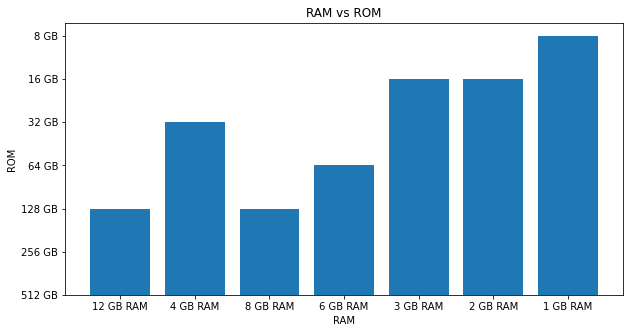

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
plt.bar(df['RAM'],df['ROM'])
plt.xlabel('RAM')
plt.ylabel('ROM')
plt.title('RAM vs ROM')

Here we can see the plot of RAM vs ROM and there are many mobiles with 8GB ROM and 1GB RAM followed by 16GB ROM and 3GB RAM.

Text(0.5, 1.0, 'Front Camera vs Rear Camera')

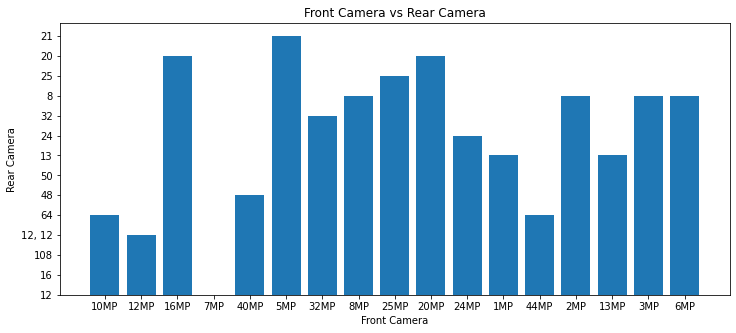

In [38]:
fig, ax = plt.subplots(figsize = (12,5))
plt.bar(df['Front Camera'],df['Rear Camera'])
plt.xlabel('Front Camera')
plt.ylabel('Rear Camera')
plt.title('Front Camera vs Rear Camera')

Variations of mobiles with front camera and rear camera are shown here.

As per the graph, there are many mobiles with 21MP rear camera and 5MP front camera.

There are few mobiles with 12MP rear camera and 12MP front camera.

Text(0.5, 1.0, 'RAM vs Front Camera')

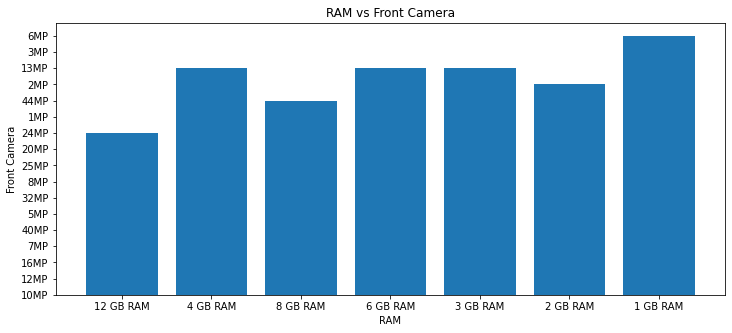

In [39]:
fig, ax = plt.subplots(figsize = (12,5))
plt.bar(df['RAM'],df['Front Camera'])
plt.xlabel('RAM')
plt.ylabel('Front Camera')
plt.title('RAM vs Front Camera')

Comparision of mobiles with front camera and RAM.

Many mobiles are having 6MP front camera and 1GB RAM.

Compared to other mobiles few mobiles have 12GB RAM with 24MP front camera.

Text(0.5, 1.0, 'RAM vs Rear Camera')

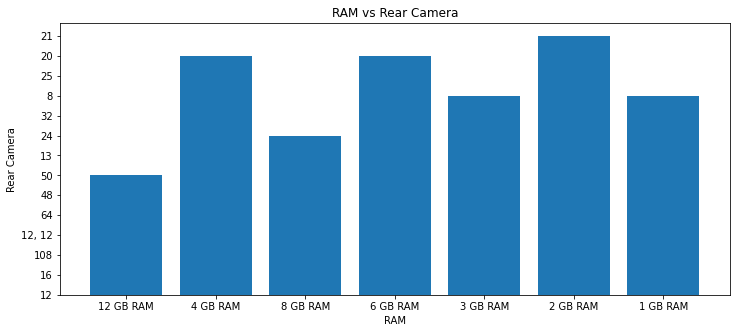

In [40]:
fig, ax = plt.subplots(figsize = (12,5))
plt.bar(df['RAM'],df['Rear Camera'])
plt.xlabel('RAM')
plt.ylabel('Rear Camera')
plt.title('RAM vs Rear Camera')

Variations of mobiles with rear camera and RAM.

Lot of mobiles are having 20MP rear camera and 4GB RAM,20MP rear camera and 6GB RAM, 21MP rear camera and 2GB RAM.

In [41]:
df

,Brand,Model Name,Colour,Price,RAM,ROM,Display,Front Camera,Rear Camera,Battery,Warranty Period
0,SAMSUNG,Galaxy,Phantom Black,"₹1,57,999",12 GB RAM,512 GB,7.6,10MP,12,4400,1
1,APPLE,iPhone,Pacific Blue,"₹1,55,900",4 GB RAM,512 GB,6.7,12MP,12,5000,1
2,APPLE,iPhone,Gold,"₹1,55,900",4 GB RAM,512 GB,6.7,12MP,12,5000,1
3,SAMSUNG,Galaxy,Mystic Bronze,"₹1,49,999",12 GB RAM,256 GB,7.6,16MP,12,4500,1
4,SAMSUNG,Galaxy,Phantom Green,"₹1,49,999",12 GB RAM,256 GB,7.6,10MP,12,4400,1
...,...,...,...,...,...,...,...,...,...,...,...
883,Redmi,Note,Red,"₹11,874",4 GB RAM,64 GB,6.26,16MP,12,4000,1
884,REDMI,9,Matte Black,"₹11,830",4 GB RAM,64 GB,6.53,8MP,13,5020,1
885,Tecno,Camon,Midnight Black,"₹11,800",4 GB RAM,64 GB,6.2,16MP,13,3500,1
886,OPPO,A31,Mystery Black,"₹11,769",4 GB RAM,64 GB,6.5,8MP,12,4230,1
